## Should I Stay or Should I Go? Unleashing the Power of Machine Learning to Predict Student Dropout and Academic Success

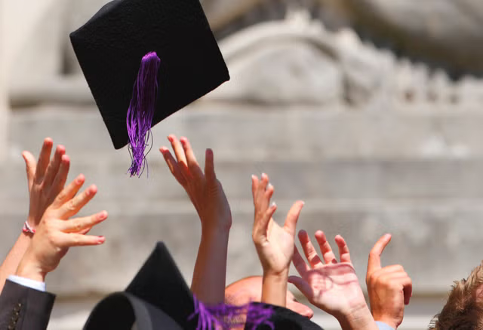

In [3]:
from IPython.display import Image
Image("graduation.png")

### BACKGROUND & AIM

#### At the start of the academic year 2021/2022, there were 2.86 million students enrolled on undergraduate courses at Higher Education (HE) institutions around the UK. Of these, 6.4% did not continue in HE after their first year. 

#### Given that HE students pay on average £9,000 per year in annual fees, that is a total loss of £1.65 billion a year in revenue to the UK’s HE sector. But the loss does not only impact universities, it is also a loss on investment for those students who dropped out of their HE courses instead of graduating. 

#### According to the Universities UK Chief Executive, that attrition (dropout) rate could rise sharply as students struggle in the cost-of-living crisis, with financial challenges now facing a broader section of students than previously seen.

#### To make matters worse, the UK Prime Minister, Rishi Sunak, announced in July 2023 that UK universities with high dropout rates will be subjected to strict controls, among which is a cap on the number of students that a university can admit to its courses. This will put further financial strain on universities with high attrition rates, and will subsequently add to the loss of income for the UK HE sector.  

#### In the last few years, our world has been revolutionised by advancements in AI and Machine Learning technologies. From medical diagnosis and translation services to fraud detection and credit risk assessment, to name but a few, AI and Machine Learning has transformed various aspects of our lives.

#### The aim of this project is to build Machine Learning models that can predict student attrition and academic success. 

#### By leveraging the power of Machine Learning, universities and the HE sector can gain valuable insights into student behaviour, make informed decisions, and develop proactive strategies to support students, ultimately reducing attrition rates and fostering a more successful learning environment.


###### Sources: 
###### Higher Education Statistics Agency (HESA): <https://www.hesa.ac.uk>
###### BBC News: <https://www.bbc.co.uk/news/uk-politics-66216005>
###### GOV.UK: <https://www.gov.uk/government/news/crackdown-on-rip-off-university-degrees>


### DATASET INFO

- Source: *University of California – Irvine, Machine Learning Repository*:

 <https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success>

- Published paper on the dataset:

‘Early prediction of student's performance in higher education: a case study’ 
<br>By Mónica V. Martins, Daniel Tolledo, Jorge Machado, Luís M. T. Baptista, and Valentim Realinho (2021). 
<br>Published in *Trends and Applications in Information Systems and Technologies*

- The dataset with 4424 rows and 37 columns
- The ‘Target’ columns has 3 classes: Dropout, Enrolled & Graduated. 
- All values are numerical except the ‘Target’ column.
- The dataset is labelled.


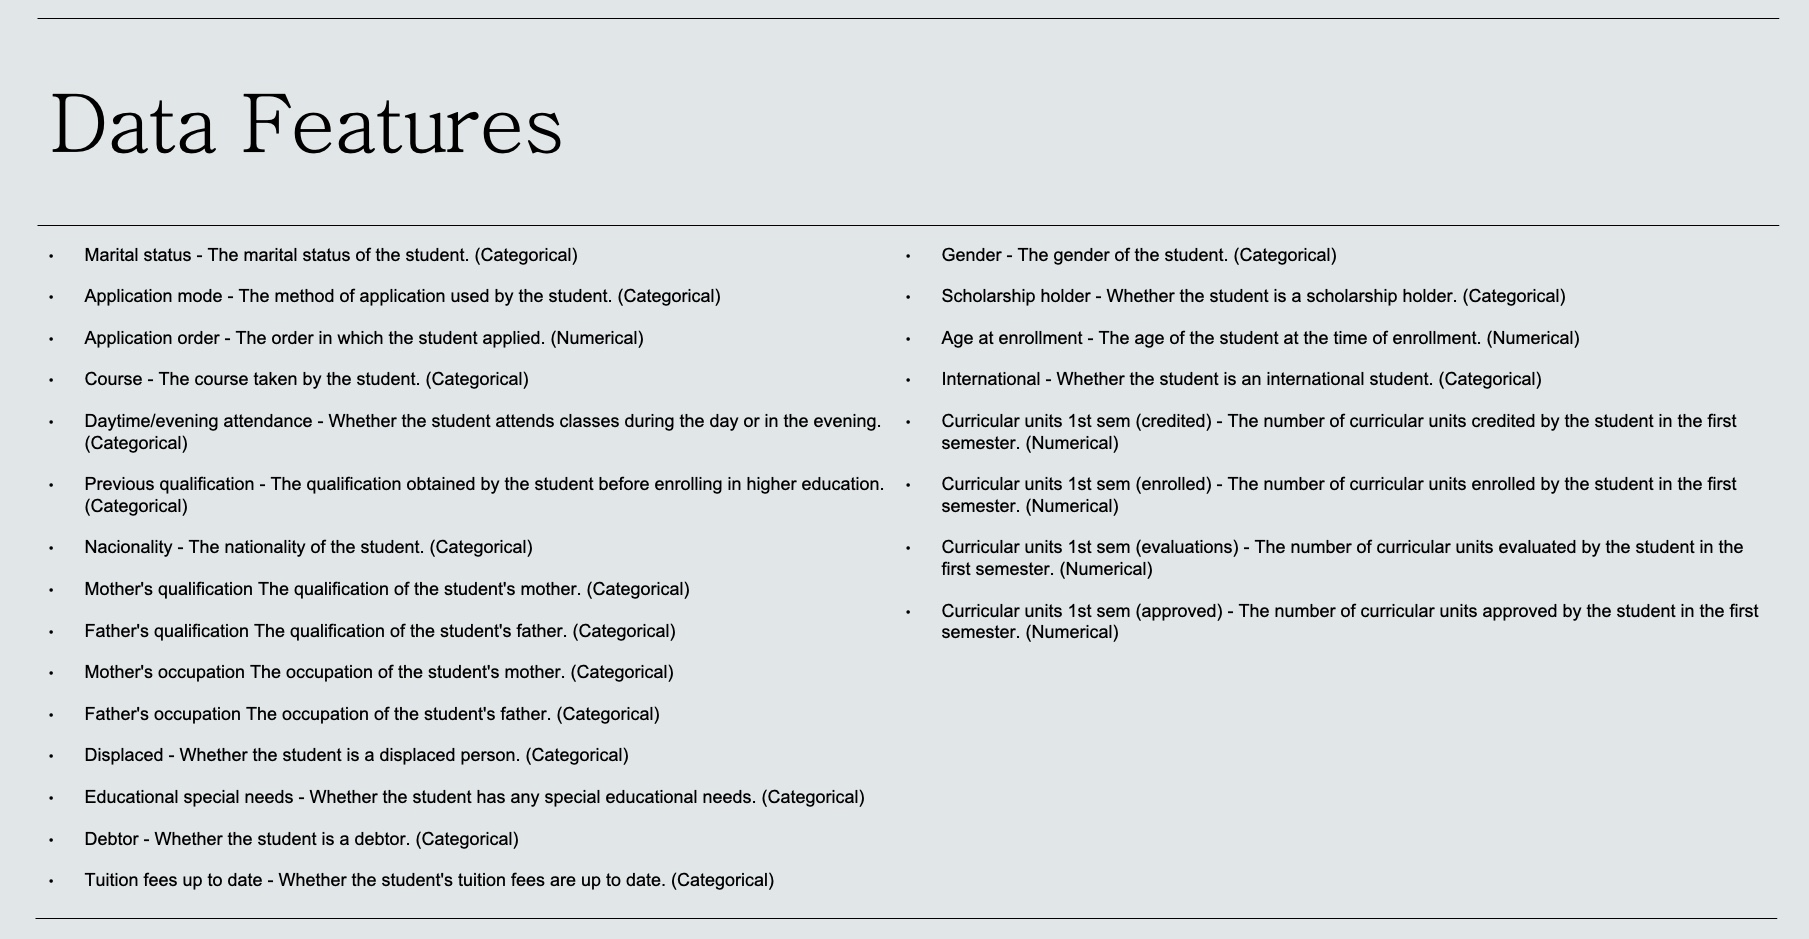

In [4]:
from IPython.display import Image
Image("uni-data-dict.png")

### PROBLEM DEFINITION

#### The dataset has 3 classes (Graduated, Enrolled, and Dropout). It would've normally been a multi-class classification problem, but given that we are only interested in predicting which students graduated and which dropped out (we are not concerned with predicting which students are still enrolled) it will be a Binary Classification Problem.

#### Moreover, our dataset is labelled, so it is a Supervised Machine Learning problem. 

### PROJECT PLAN

1. Import Libraries
2. Upload Data
3. Explore Data (Explorataory Data Analysis, EDA)
4. Prepare Data for Machine Learning (Pre-processing)
5. Build & Train Supervised Machine Learning Models:
- 5.1. Logistic Regression
- 5.2. K-nearest Neighbor (KNN)
- 5.3. Random Forest Classifier
- 5.4. Decision Tree Classifier
- 5.5. Naive Bayes
- 5.6. Support Vector Classification (SVC)
6. Improve Machine Learning Models: Hyper-parameter Tuning
7. Evaluate the best ML Model
8. Feature Importance

### 1. Import Libraries

In [5]:
# Standard Libraries
import pandas as pd
import numpy as np

# Visualisation Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import kaleido 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Pre-processing Libraries
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Machine Learning Libraries
# # Supervised Machine Learning Models (Classification) from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Evaluation Libraries
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Misc.
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from IPython.display import Image
import math
import pickle

### 2. Upload Data

In [6]:
df = pd.read_csv('university-data.csv')
df

,"Marital status;Application mode;Application order;Course;""Daytime/evening attendance\t"";Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target"
0,1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...
1,1;15;1;9254;1;1;160.0;1;1;3;3;3;142.5;1;0;0;0;...
2,1;1;5;9070;1;1;122.0;1;37;37;9;9;124.8;1;0;0;0...
3,1;17;2;9773;1;1;122.0;1;38;37;5;3;119.6;1;0;0;...
4,2;39;1;8014;0;1;100.0;1;37;38;9;9;141.5;0;0;0;...
...,...
4419,1;1;6;9773;1;1;125.0;1;1;1;5;4;122.2;0;0;0;1;1...
4420,1;1;2;9773;1;1;120.0;105;1;1;9;9;119.0;1;0;1;0...
4421,1;1;1;9500;1;1;154.0;1;37;37;9;9;149.5;1;0;0;1...
4422,1;1;1;9147;1;1;180.0;1;37;37;7;4;153.8;1;0;0;1...


In [7]:
df.shape

(4424, 1)

In [8]:
# Dataframe has only 1 column.
# Using 'delimiter=' argument to fix it
df = pd.read_csv('university-data.csv', delimiter=';')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


### 3. Explore Data (Explorataory Data Analysis, EDA)

In [9]:
# Checking dataset shape
df.shape

(4424, 37)

In [10]:
# Checking data types: all columns are numerical except the 'Target' column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [11]:
# Checking for duplicates - no duplcates
df.duplicated().sum()

0

In [12]:
# Checking for missing values - no missing values
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [13]:
# Checking statistical information
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


<function matplotlib.pyplot.show(close=None, block=None)>

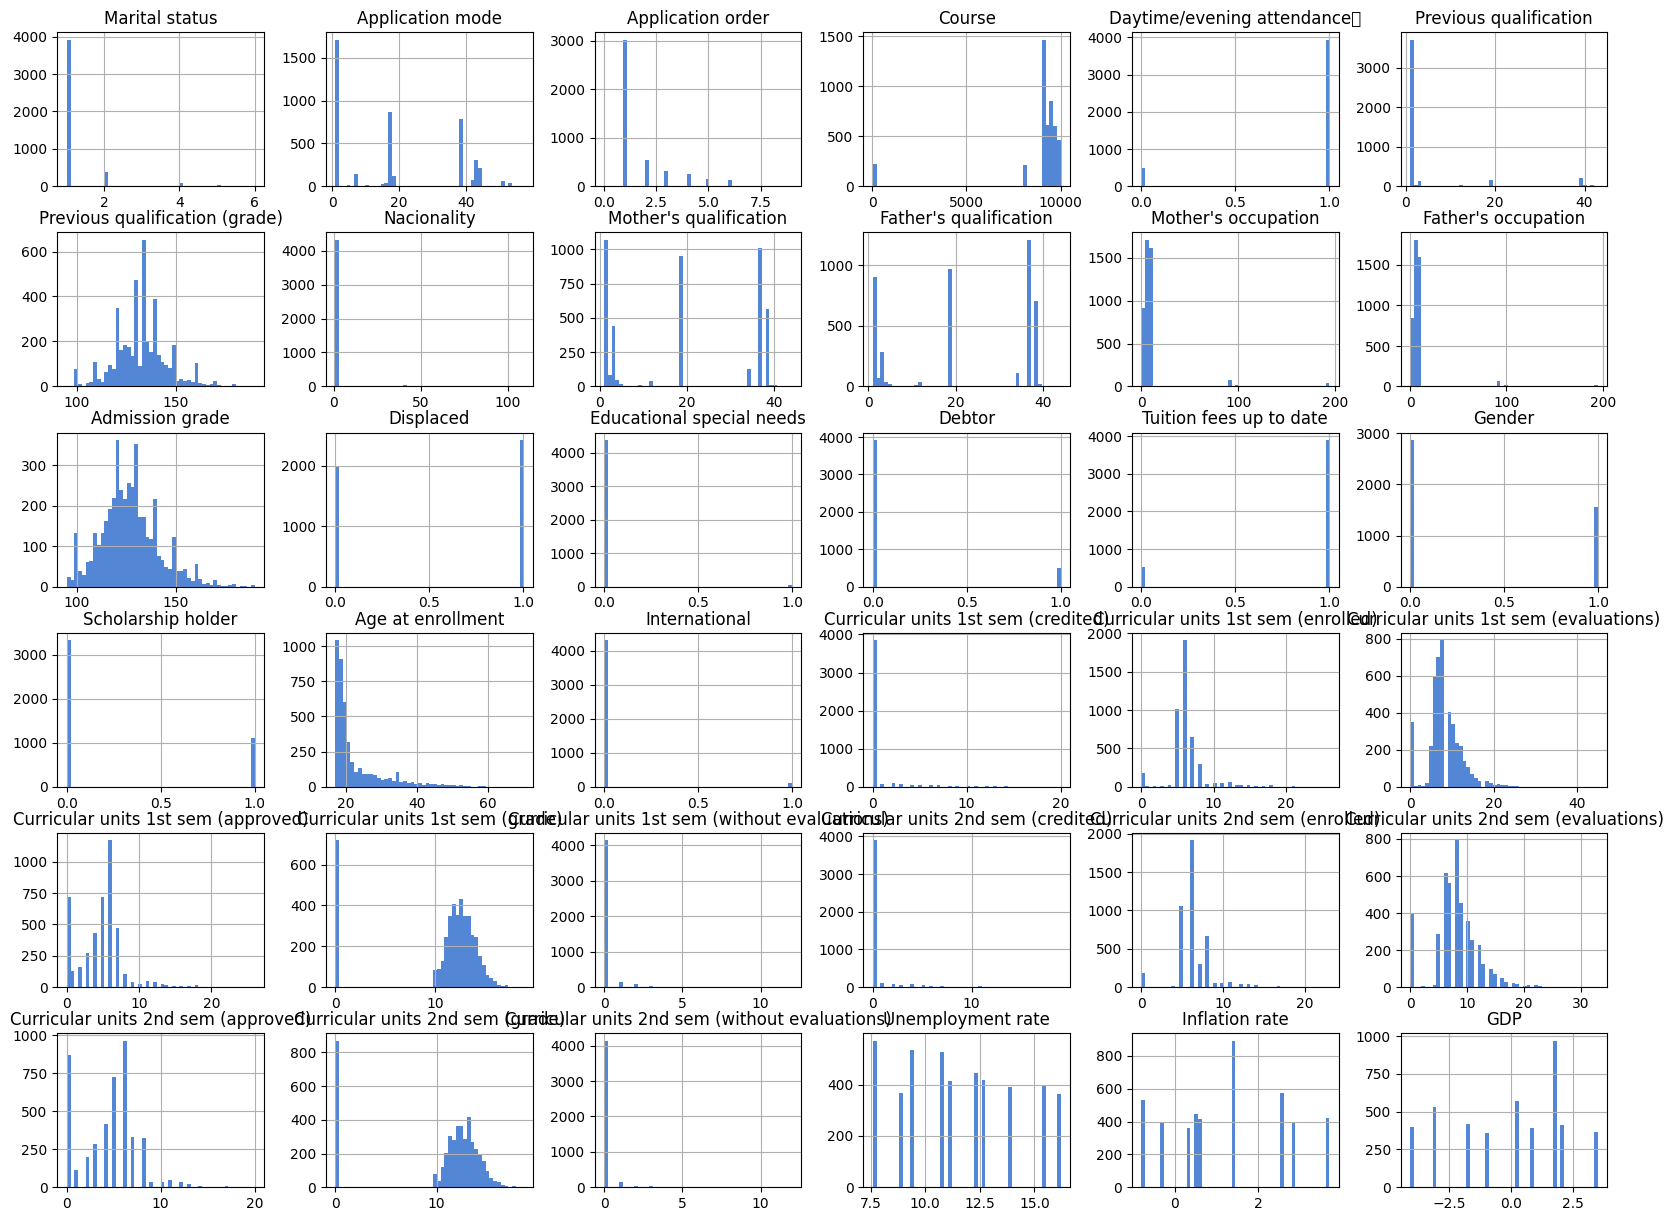

In [14]:
df[df.columns].hist(bins=50, figsize=(20,15), color='#5486d6')
plt.show

In [15]:
# creating a list of columns in my data
col = list(df.columns)
# removing 'Target' column from that list
col.remove('Target')
# creating a new list categorical_features and assigning it the value ['Target'] as a categorical feature
categorical_features = ['Target']
# After removing 'Target', all columns in our dataset is numerical, so I will now create a new list for numerical features / columns
numerical_features = [*col]
# printing both numerical & categorical columns
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Target
Numerical Features : Marital status Application mode Application order Course Daytime/evening attendance	 Previous qualification Previous qualification (grade) Nacionality Mother's qualification Father's qualification Mother's occupation Father's occupation Admission grade Displaced Educational special needs Debtor Tuition fees up to date Gender Scholarship holder Age at enrollment International Curricular units 1st sem (credited) Curricular units 1st sem (enrolled) Curricular units 1st sem (evaluations) Curricular units 1st sem (approved) Curricular units 1st sem (grade) Curricular units 1st sem (without evaluations) Curricular units 2nd sem (credited) Curricular units 2nd sem (enrolled) Curricular units 2nd sem (evaluations) Curricular units 2nd sem (approved) Curricular units 2nd sem (grade) Curricular units 2nd sem (without evaluations) Unemployment rate Inflation rate GDP


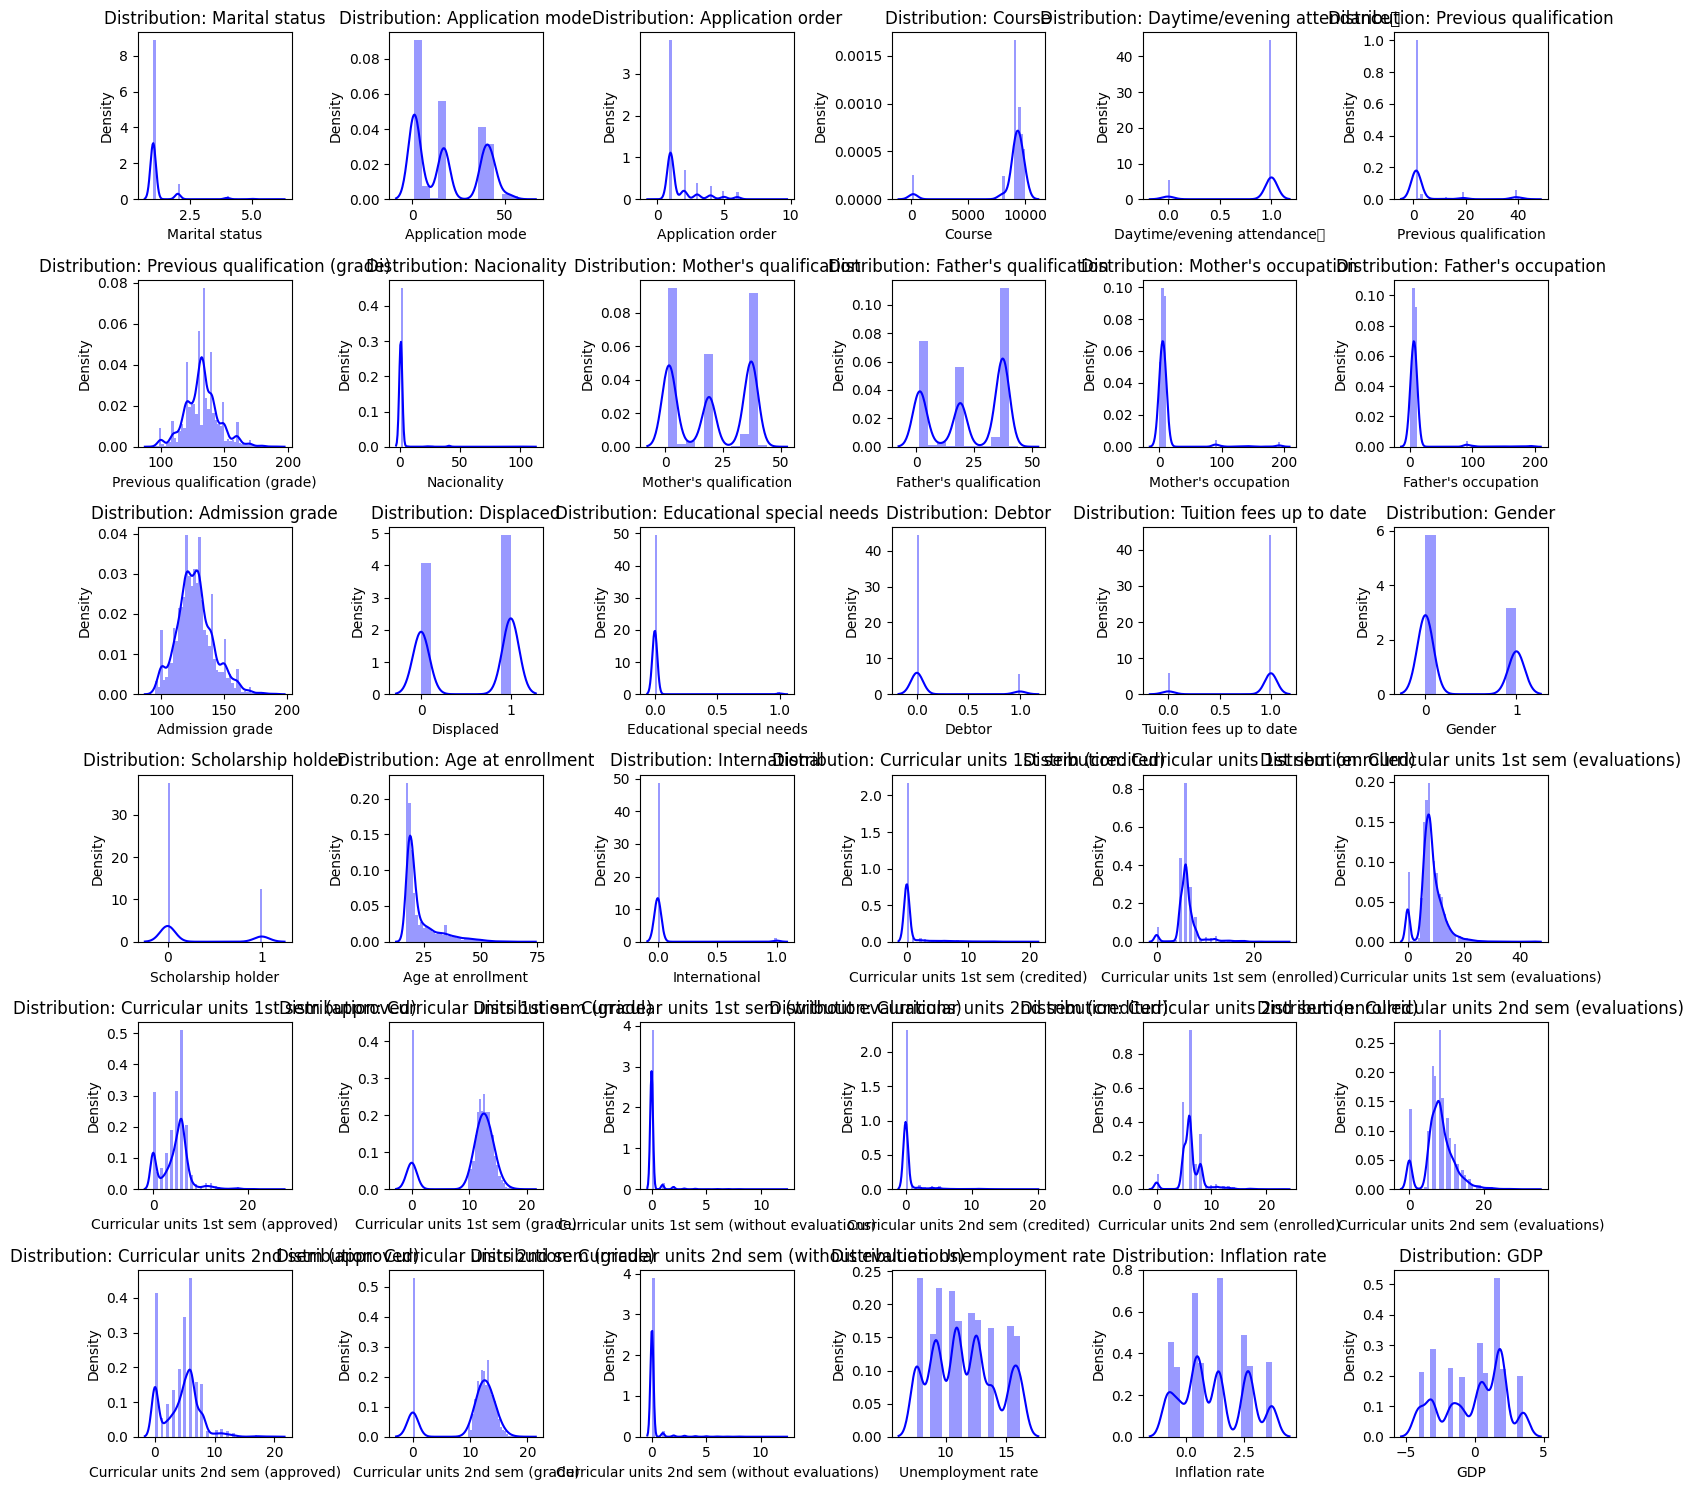

In [16]:
# Checking how data is skewed: lots of columns are right skewed, but some columns are left skewed.
num_columns = 36
num_rows = math.ceil(num_columns / 6)

fig, ax = plt.subplots(nrows=num_rows, ncols=6, figsize=(15, 15))

for i in range(num_columns):
    plt.subplot(num_rows, 6, i + 1)
    sns.distplot(df[numerical_features[i]], color='blue')
    title = 'Distribution: ' + numerical_features[i]
    plt.title(title)

plt.tight_layout()
plt.show()


In [17]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

[Text(0, 0, '1421'), Text(0, 0, '2209'), Text(0, 0, '794')]

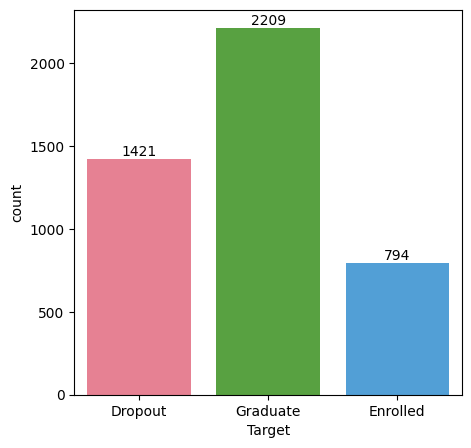

In [18]:
# Checking the balance of classes in the dataset
# There's an imbalance of classes: graduated is almost double enrolled, and dropped out is is less than half of graduated
plt.figure(figsize =(5,5))
fig_1 = sns.countplot(x= df["Target"], palette= 'husl')
fig_1.bar_label(fig_1.containers[0])

<Axes: ylabel='count'>

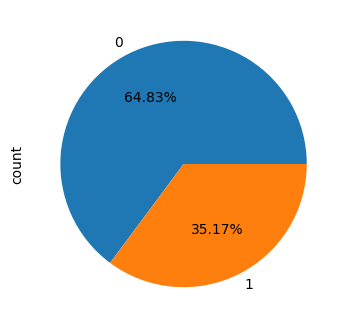

In [19]:
# Plotting the ratio of male and female students in our dataset, where Male = 1, Female = 0
fig = plt.figure(figsize=(4,4))
df['Gender'].value_counts().plot.pie(autopct = '%1.2f%%')

In [20]:
# Groupy 'Gender' where Male = 1, Female = 0
df.groupby(['Gender','Target'])['Target'].count()

Gender  Target  
0       Dropout      720
        Enrolled     487
        Graduate    1661
1       Dropout      701
        Enrolled     307
        Graduate     548
Name: Target, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

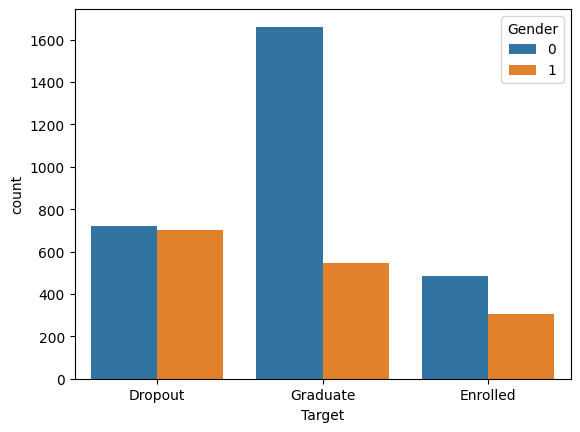

In [21]:
sns.countplot(x=df.Target, data=df, hue="Gender")

• A disproportionate number of females graduated by comparison to males, but this should not be surprising since (as we saw in the previous pie plot) our dataset has more data points for females than males (65% female vs 35% male).

In [22]:
# Groupy 'Tuition fees up to date' where Up to Date = 1, Not Up to Date = 0
df.groupby(['Tuition fees up to date','Target'])['Target'].count()

Tuition fees up to date  Target  
0                        Dropout      457
                         Enrolled      42
                         Graduate      29
1                        Dropout      964
                         Enrolled     752
                         Graduate    2180
Name: Target, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

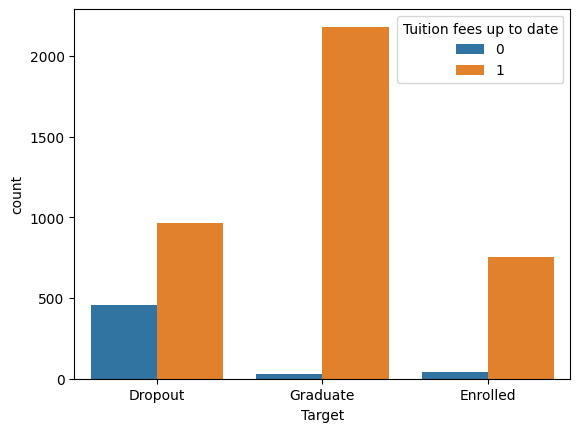

In [23]:
sns.countplot(x=df.Target, data=df, hue="Tuition fees up to date")

* From the above, we can see that a large number of the students who dropped out were also those whose fees were not up to date. Conversley, the students who have their fees up to date seem to be the most successful (i.e. successfully graduated). 

In [24]:
# Correlation Matrix to show positve & negative correlations between the different features of our dataset
corr_mat = df.corr(numeric_only=True)
corr_mat

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,...,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,...,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,...,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,...,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265
Daytime/evening attendance\t,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,...,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,...,0.002887,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,...,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,...,0.009145,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,...,0.003183,0.042771,0.035150,0.021033,-0.014858,-0.031175,0.021305,-0.114351,0.059441,-0.083657
Father's qualification,0.130353,0.083276,-0.050288,0.050724,-0.139894,-0.006614,-0.035234,-0.085282,0.535140,1.000000,...,-0.017333,0.042666,0.024380,0.009514,0.005285,-0.008083,-0.007430,-0.077905,0.057633,-0.071610


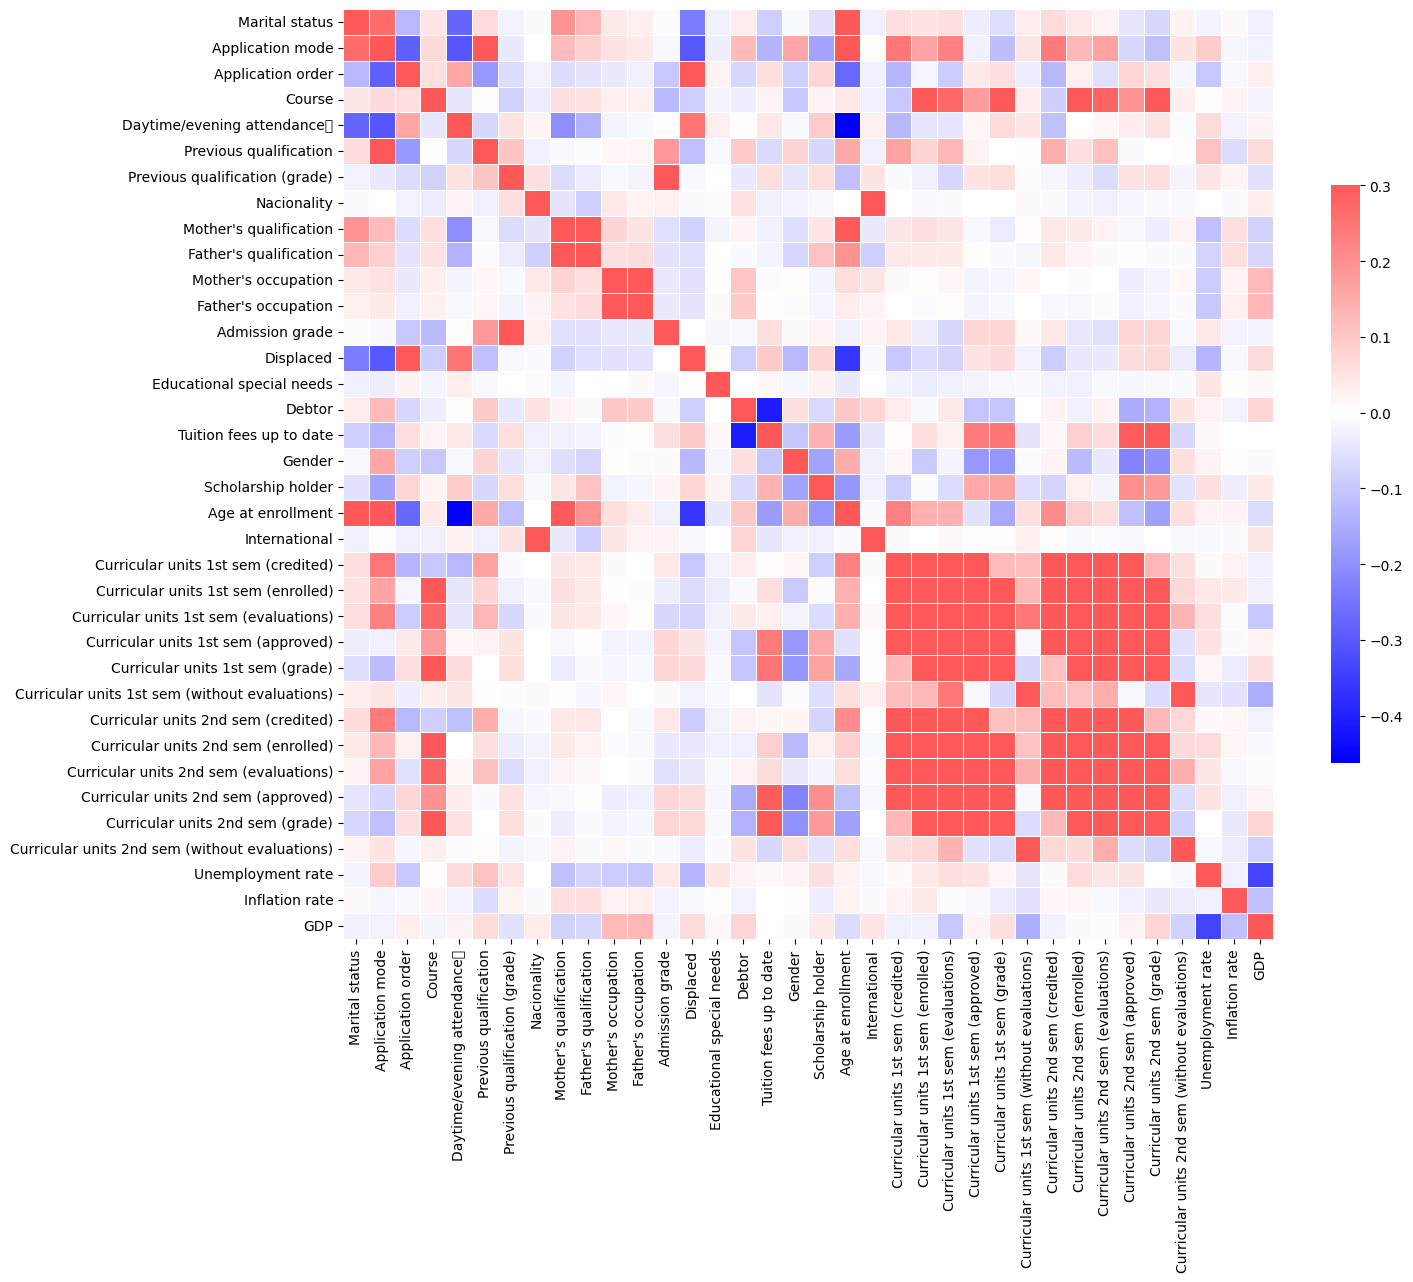

In [25]:
# Plotting the correlation matrix
f = plt.figure(figsize=(15, 15))
sns.heatmap(corr_mat, annot=False, cmap='bwr', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

<Axes: xlabel='Scholarship holder', ylabel='Count'>

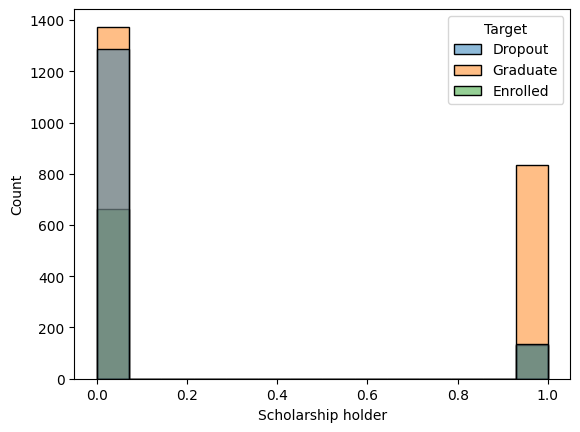

In [26]:
sns.histplot(x='Scholarship holder', data=df,hue='Target')

* The above bar plot shows that there's a strong correlation between those who drop out of university not being scholarship holders, and the inverse is also true: that scholarship holders are less likely to drop out. 
* We cannot jump to the conclusion at this point because we don't know what are the criteria for a student having a scholrship. If scholarhsips are awarded based on academic mertit, for example, then a student's success is not solely due to their having a scholarhsip, but rather the other way around (they've been awarded a scholarhsip because they are academically strong).

### 4. Prepare Data for Machine Learning (Pre-processing)

In [27]:
# Will drop all the datapoints belonging to the 'Enrolled' class in my dataset since it's irrelevant to our problem (i.e. whether a student will drop out or graduate)
df = df[df['Target'] != 'Enrolled']

In [28]:
df['Target']

0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: Target, Length: 3630, dtype: object

* The 'Enrolled' class has now been dropped from our dataset, making this a **Binary Classification Problem** where:
- 0 = Dropout
- 1 = Graduated

In [29]:
# Transform categorical columns into numerical
labelencoder = LabelEncoder()
df['Target'] = labelencoder.fit_transform(df['Target'])

In [30]:
# Sorting features that are correlated with the 'Target' in ascending order to see if I can reduce the features of my dataset
df.corr()['Target'].sort_values(ascending=False)

Target                                            1.000000
Curricular units 2nd sem (approved)               0.653995
Curricular units 2nd sem (grade)                  0.605350
Curricular units 1st sem (approved)               0.554881
Curricular units 1st sem (grade)                  0.519927
Tuition fees up to date                           0.442138
Scholarship holder                                0.313018
Curricular units 2nd sem (enrolled)               0.182897
Curricular units 1st sem (enrolled)               0.161074
Admission grade                                   0.128058
Displaced                                         0.126113
Curricular units 2nd sem (evaluations)            0.119239
Previous qualification (grade)                    0.109464
Application order                                 0.094355
Daytime/evening attendance\t                      0.084496
Curricular units 1st sem (evaluations)            0.059786
Curricular units 2nd sem (credited)               0.0524

In [31]:
# Dropping columns that do not show a strong positive or negative (inverse) correlation in the above list from our dataset. Also dropping 'Application order' & 'GDP' as they don't seem to have bearing on student success / dropout
df.drop(['Application order',
         'Unemployment rate',
         'International',
         "Father's qualification",
         "Father's occupation",
         "Mother's occupation",
         'Educational special needs',
         'Nacionality',
         'Inflation rate',
         'GDP'], axis=1, inplace=True)

In [32]:
# Split dataset into x/y
x = df.drop('Target', axis=1)
y = df['Target']

In [33]:
# Split into training & test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 42)

### 5. Build & Train Supervised Machine Learning Models:
- 5.1. Logistic Regression
- 5.2. K-nearest Neighbor (KNN)
- 5.3. Random Forest Classifier
- 5.4. Decision Tree Classifier
- 5.5. Naive Bayes
- 5.6. Support Vector Classification (SVC)

#### Build the ML Models

In [34]:
models = {"logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Decision Tree Classifier": DecisionTreeClassifier(),
          "Naive Bayes": GaussianNB(),
          "Support Vector Classification": SVC()}

def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits & evaluates given ML mododels.
    models: a dict of different Scikit-Learn ML models
    x_train: training data (no labels)
    x_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

#### Fit data to ML models & score accuracy

In [35]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'logistic Regression': 0.8677685950413223,
 'KNN': 0.7878787878787878,
 'Random Forest': 0.9022038567493113,
 'Decision Tree Classifier': 0.849862258953168,
 'Naive Bayes': 0.8553719008264463,
 'Support Vector Classification': 0.6184573002754821}

#### Compare the models' accuracy score

<Axes: >

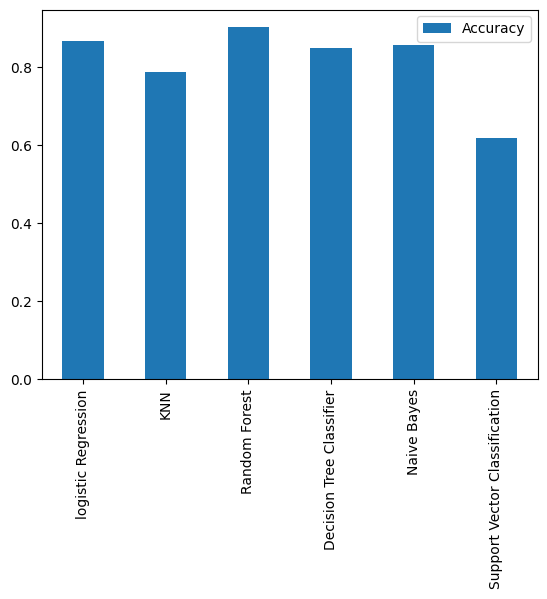

In [36]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar()

* From the above graph we can see that the Random Forest Classifier model has performed best in terms of accuracy score, follow by the Logistic Regression model.

### 6. Improve Machine Learning Models: Hyper-parameter Tuning

We now want to fine-tune our models' hyperparameters to improve their accuracy score. We will use the following methods:

- Finding the best K value for our KNN model
- Randomized Search CV
- Grid Search CV

In [37]:
# Tuning KNN Model to improve the model. Will try 20 different versions of the number of neighbors (K) (range 1-20) to see which one is better
train_scores = []
test_scores = []

# Creating a list of different values for number of neighbors (K) in the range of 1-21 (default no. of neighbours (K) is usually 5, as per sklearn docs) )
neighbors = range(1, 21)

# Setting up KNN instance
knn = KNeighborsClassifier()

# Looping through different number of neighbors (K) (i is going to loop through the range)
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fitting the algorithm
    knn.fit(x_train, y_train)

    # Updating the training scores list
    train_scores.append(knn.score(x_train, y_train))

    # Updating the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [38]:
train_scores

[1.0,
 0.8977272727272727,
 0.8746556473829201,
 0.856404958677686,
 0.8443526170798898,
 0.8381542699724518,
 0.8316115702479339,
 0.8240358126721763,
 0.8202479338842975,
 0.8181818181818182,
 0.8085399449035813,
 0.806129476584022,
 0.8040633608815427,
 0.8075068870523416,
 0.8037190082644629,
 0.8054407713498623,
 0.800275482093664,
 0.8026859504132231,
 0.7944214876033058,
 0.7985537190082644]

In [39]:
test_scores

[0.7534435261707989,
 0.7203856749311295,
 0.7796143250688705,
 0.7603305785123967,
 0.7878787878787878,
 0.7727272727272727,
 0.7865013774104683,
 0.7823691460055097,
 0.7892561983471075,
 0.7837465564738292,
 0.7741046831955923,
 0.7837465564738292,
 0.7754820936639119,
 0.778236914600551,
 0.7727272727272727,
 0.7768595041322314,
 0.7699724517906336,
 0.778236914600551,
 0.7658402203856749,
 0.7727272727272727]

Maximum KNN score on the test data: 78.925620%


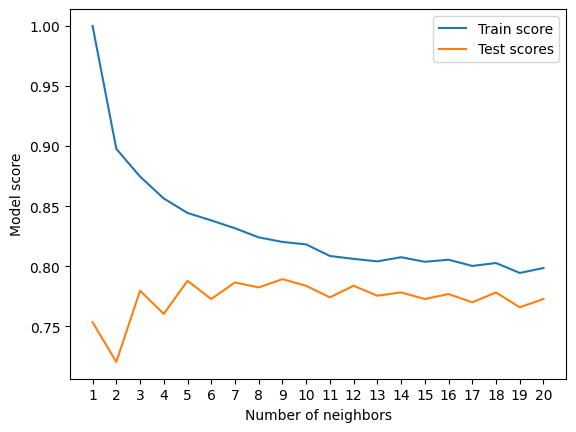

In [40]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test scores')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:2f}%')

From above we can see that the best number of neighbors (K) is 10 since it yields the best score on our test set

 - Our KNN model's previous score was 0.7878787878787878
 - After hyperparameter tuning of our KNN model, the best score is 78.925620

So, despite the slight improvement, it's not a huge difference. 

In [41]:
# Creating a hyperparameter grid for Logistic Regression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Creating a hyperparameter grid for RandomForestClassifier
# Creating a range with continuous distribution of parameters (i.e. a range with numbers that arer 50 apart, between 10 - 10000
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

#### Randomized Search CV

Tuning the Logistic Regression ML Model

In [42]:
# Tuning Logistic Regression
## Setting up random seed so our results are reproducible 
np.random.seed(42)

# Setting up hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fitting random hyperparameter search model for Logistic regression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [43]:
# Checking for the best parameters for our Logistic Regression model
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [44]:
# Evaluating it now on our test data
rs_log_reg.score(x_test, y_test)

0.9159779614325069

Our Logistic Regression Model has vastly improved in accuracy after the Randomized Search CV hyper-parameter tuning:

 - Score BEFORE tuning the model's hyperparameters = 0.8677685950413223
 - Score AFTER tuning the model's hyperparameters = 0.9159779614325069

Tuning the Random Forest Classifier ML Model via Randomized Search CV

In [45]:
# Setting up random seed
np.random.seed(42)

# Setting up random hyperparameters search for Random Forest Classifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fitting hyperparameter search model for Random Forest Classifier
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [46]:
# Finding the best hyperparameters using '.best_params_'
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [47]:
# Evaluating the randomized search Random Forest Classifier model
rs_rf.score(x_test, y_test)

0.8994490358126722

Our Random Forest Classifier Model has NOT benefited in accuracy after the Randomized Search CV hyper-parameter tuning. The model had actually performed better before the tuning:

 - Score BEFORE tuning the model's hyperparameters = 0.9022038567493113
 - Score AFTER tuning the model's hyperparameters = 0.8994490358126722

#### Grid Search CV

* Tuning the Logistic Regression ML Model via Grid Search CV

In [48]:
## Creating different hyperparameters for Logistic Regression 
log_red_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setting up grid hyperparameters search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fitting our grid hyperparameter search model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [49]:
gs_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [50]:
# Evaluating the grid search Logistic Regression model
gs_log_reg.score(x_test, y_test)

0.9159779614325069

#### Which Machine Learning Model Performed Best?

Our Grid Search CV hyper-parameter tuning has not had any effect on the accuracy score of our Logistic Regression model since that score is identical to the one we got after we tuned its hyper-parameters using the Randomized Search CV.

But our Logistic Regression model is still the best performing one out of all the models we've tried with a test accuracy score of **91.6 %** AFTER hyper-parameter tuning using Randomized Search CV & Grid Search CV.

So far, then, the worse performing models are SVC followed by KNN, whilst the best performing one is Logistic Regression, followed by Random Forest Classifier (before we tune its hyper-parameters).

As a reminder, below are the original model scores BEFORE we do any hyper-parameter tuning

In [51]:
model_scores

{'logistic Regression': 0.8677685950413223,
 'KNN': 0.7878787878787878,
 'Random Forest': 0.9022038567493113,
 'Decision Tree Classifier': 0.849862258953168,
 'Naive Bayes': 0.8553719008264463,
 'Support Vector Classification': 0.6184573002754821}

### 7. Evaluate the Best ML Model for our project: Logistic Regression

Now that we have identified the best performing ML model for this project (Logistic Regression), we will next use the following methods to evaluate the acciuracy of its predictions:

* ROC Curve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-score

But in order to do so, we will need to make predictions first (on our x_test set), and then compare those prediction to the 'actual' truth labels (i.e. the targets in our y_test set)

LOGISTIC REGRESSION (our best scoring ML model so far)

In [52]:
# Making predictions with our tuned Logistic Regression model
y_preds = gs_log_reg.predict(x_test)

In [53]:
y_preds

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [54]:
y_test

847     1
3927    0
524     0
223     1
3198    0
       ..
1669    1
3377    1
3634    1
3038    1
2836    0
Name: Target, Length: 726, dtype: int64

ROC Curve & AUC Score

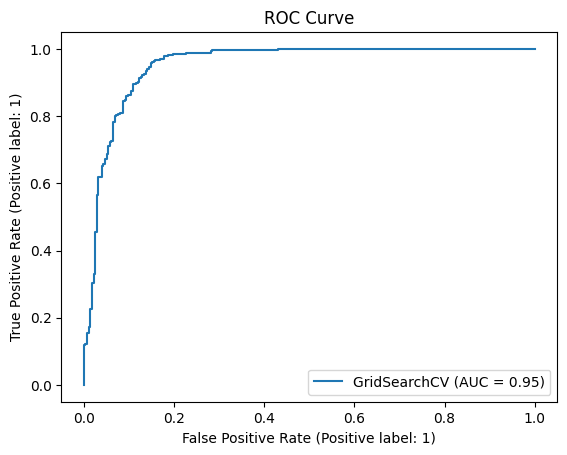

AUC score: 0.952119833082743


In [55]:
# Plottong ROC Curve and calculating AUC 

# Plotting ROC curve first
roc_display = RocCurveDisplay.from_estimator(estimator=gs_log_reg, X=x_test, y=y_test)
plt.title('ROC Curve')
plt.show()

# Now we calculate the AUC score
y_pred_probs = gs_log_reg.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_probs)
print("AUC score:", auc_score)


As we can see from the above plot, **our Logistic Regression Model's AUC (Area Under the Curve) score is: 0.952119833082743**.

Anything above 0.9 indicates an excellent performance by an ML model. 

Our Logistic Regression model, therefore, has a very high ability to distinguish between the positive (Graduated) and negative (Dropout) classes, making it a strong classifier model.


In [56]:
gs_log_conf_mat = confusion_matrix(y_test, y_preds)
gs_log_conf_mat

array([[236,  41],
       [ 20, 429]])

In [57]:
gs_reg_pred = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_preds})

In [58]:
gs_reg_pred

,Actual Value,Predicted Value
847,1,1
3927,0,1
524,0,0
223,1,1
3198,0,0
...,...,...
1669,1,1
3377,1,1
3634,1,1
3038,1,1


Confusion Matrix for our Logistic regression Model

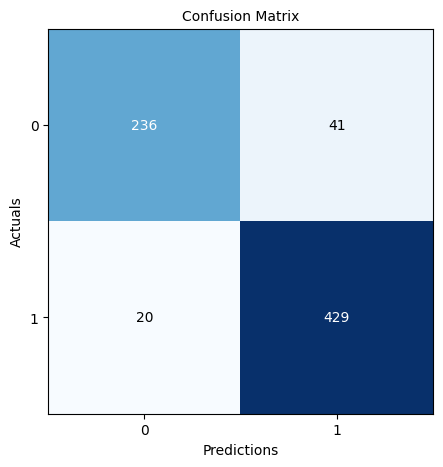

In [59]:
fig, ax = plot_confusion_matrix(conf_mat=gs_log_conf_mat, figsize=(5, 5), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

Classification Report (precision, recall, f1 score) for our Logistic regression Model

In [60]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.85      0.89       277
           1       0.91      0.96      0.93       449

    accuracy                           0.92       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.92      0.92      0.92       726



* In the Classification Report above, 'precision' mean the positive class that our model predicted (in our case, this is the students who 'Graduated' or class '1'), whereas 'recall' means the percentage of actual positive ('Graduated') that our Logistic Regression model predicted. Finally, F1 is a combination of both precision and recall. 
* We can see here that our model preformed slightly better when predicting the positive class ('Graduated') than the negative class ('Dropout' or '0'). This could be due to the fact that our data was imbalanced when it came to the number of classes we had (recall that earlier we said that we had twice as many data points for our 'Graduated' class than we did for our 'Dropout' class). 
* Moving forward, a way of improving our model's predictions would be to try a method called "Oversampling". There are a variety of oversampling techniques, such as SMOTE, to balance the datapoints for the classes. For now, our model's prediction accuracy fits our project's aims, so I will not be pursuing any oversampling methods at present.

With the above evaluation metrics showing that the Logistic regression ML model we built has a prediction accuracy rate of mostly > 90% accross a variety of evaluation methods, we know this ML model has achieved our project's aim of building an ML model that can successfully predict students who dropped out of university and those who successfully graduated. 

### 8. Feature Importance of the Logistic Regression Model

Now that we have successfully built and identified an ML model to predict student dropout and success, we will turn to a method called "feature Importance" (i.e. finding the most important features that contributed to our model's predictions) to understand our ML model.

Although not a necessary step in building our model, Feature Importance can help us understand how our Logistic Regression Model made it's predictions. For example, it can show which features of our dataset the model gave more weight and importance to when it made its predictions. 

Feature Importance has the benefit of making ML models more interpretable and explainable, thereby promoting "Transparency" in Data Science. 

Transparency and Explainability are key components of building trust in AI and Machine Learning technologies.

Moreover, Feature Importance helps data scientists gain insights into the underlying data, and identify potential patterns and hidden relationships between the different features of the data, uncover if the model's analysis is inconsistent with domaine knowledge or (ethical) expectations, and improving the model's overall performance. 

In [61]:
# Fitting an instance of our Logistic regression model
gs_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [62]:
clf = LogisticRegression(C=1.623776739188721,
                         solver="liblinear")

clf.fit(x_train, y_train)

LogisticRegression(C=1.623776739188721, solver='liblinear')

In [63]:
# Checking the co-efficient of our model
clf.coef_


array([[ 1.44396676e-01, -8.44807506e-03, -2.18663991e-04,
        -1.89104590e-01,  1.25635665e-02, -3.01322382e-03,
         3.20616402e-03,  1.66085524e-03, -1.04106771e-01,
        -6.09226085e-01,  1.01571432e+00, -2.56906937e-01,
         5.51546168e-01, -2.41854740e-02, -1.67036246e-01,
        -3.56468492e-01,  4.84613728e-02,  5.93680871e-01,
        -1.98304907e-02,  7.95826257e-02, -1.75228370e-01,
        -5.89792582e-01, -3.49331397e-02,  9.37976725e-01,
         1.03474876e-01,  2.60117942e-01]])

In [64]:
# Matching our coefficients with our dataset's features (columns)
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'Marital status': 0.1443966760510232,
 'Application mode': -0.008448075060454304,
 'Course': -0.00021866399132062267,
 'Daytime/evening attendance\t': -0.1891045896435715,
 'Previous qualification': 0.012563566540429035,
 'Previous qualification (grade)': -0.0030132238215055712,
 "Mother's qualification": 0.0032061640176935767,
 'Admission grade': 0.0016608552382256921,
 'Displaced': -0.10410677147708797,
 'Debtor': -0.609226084578902,
 'Tuition fees up to date': 1.015714322565748,
 'Gender': -0.2569069373620686,
 'Scholarship holder': 0.5515461676068497,
 'Age at enrollment': -0.024185473978226357,
 'Curricular units 1st sem (credited)': -0.16703624553992127,
 'Curricular units 1st sem (enrolled)': -0.3564684924796134,
 'Curricular units 1st sem (evaluations)': 0.04846137282933316,
 'Curricular units 1st sem (approved)': 0.5936808708133151,
 'Curricular units 1st sem (grade)': -0.01983049069941008,
 'Curricular units 1st sem (without evaluations)': 0.07958262567211785,
 'Curricular u

<Axes: title={'center': 'Feature Importance'}>

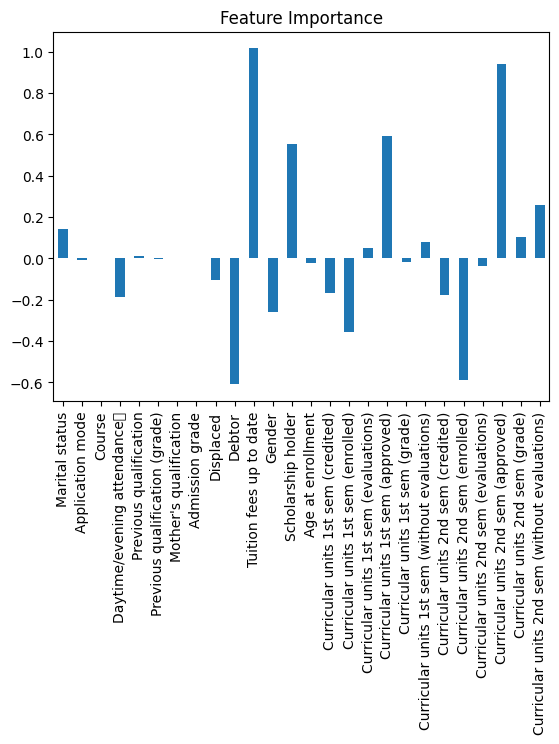

In [65]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

In [66]:
pd.crosstab(df['Tuition fees up to date'], df['Target'])

Target,0,1
Tuition fees up to date,,
0,457,29
1,964,2180


In [67]:
457/29

15.758620689655173

In [68]:
2180/964

2.2614107883817427

From the above we can see that these are the features that our model is assigning the highest importance to when it's making it's predictions:

1. 'Tuition fees up to date'
2. 'Curricular units 1st sem (approved)'
3. 'Curricular units 2nd sem (approved)'
4. 'Scholarship holder'

This is aligned with what the correlation heatmap had revealed earlier in our project, again suggesting that there is a close correlation between a student's financial circumstances on the one hand, and their academic success or risk of performing poorly, and hence dropping out, on the other. 

Using the crosstab fuction, we can see that:
* Students whose fees are up to date are more than twice as likely to go on to graduate; and,
* Students whose fees are *not* up to date are almost *16 times* more likely to drop out of their university studies than those whose fees are up to date.

Therefore, the takeaway message that we get from our Feature Importance is that whenever the students' fees are up to date (and this could be because they receive a scholrship) then academic performace is also good. Likewise, whenever fees and academic performance are good, students go on to graduate and, hence, the risk of attrition is minimised. 


### 9. Saving our Logistic Regression Model

In [70]:
import pickle
with open('uni_model', 'wb') as file:
    pickle.dump(gs_log_reg, file)